In [1]:
from knns.hnsw import HNSW_Graph
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from data import generate_embeddings

db_embeddings = generate_embeddings(1000, size=2)

In [16]:
db_name = 'sift1m2d'
db_embeddings = np.load(f"../data/tfds_db_{db_name}.npy")

In [3]:
from knns.hnsw import HNSW

hnsw = HNSW()
hnsw.insert(db_embeddings) #2d: 18m 8.4s #full: 25m 32.6s

0: 0.0s
100: 0.02699732780456543s
200: 0.03899979591369629s
300: 0.047002553939819336s
400: 0.05999755859375s
500: 0.0709996223449707s
600: 0.07100319862365723s
700: 0.07699894905090332s
800: 0.0839986801147461s
900: 0.08099937438964844s
1000: 0.08700013160705566s
1100: 0.08600258827209473s
1200: 0.08600306510925293s
1300: 0.08299517631530762s
1400: 0.08199930191040039s
1500: 0.08999967575073242s
1600: 0.0840001106262207s
1700: 0.0820000171661377s
1800: 0.08500289916992188s
1900: 0.08499836921691895s
2000: 0.0969994068145752s
2100: 0.08900237083435059s
2200: 0.09499740600585938s
2300: 0.09300112724304199s
2400: 0.09799981117248535s
2500: 0.09300041198730469s
2600: 0.08899974822998047s
2700: 0.09700131416320801s
2800: 0.0989987850189209s
2900: 0.10199999809265137s
3000: 0.0970003604888916s
3100: 0.09399986267089844s
3200: 0.10799884796142578s
3300: 0.10599946975708008s
3400: 0.10000038146972656s
3500: 0.10199952125549316s
3600: 0.10200023651123047s
3700: 0.10100078582763672s
3800: 0.093

In [4]:
import pickle

with open(f'../data/hnsw_{db_name}.pkl', 'wb') as file:
    pickle.dump(hnsw, file, pickle.HIGHEST_PROTOCOL)

In [21]:
import pickle

with open(f'../data/hnsw_{db_name}.pkl', 'rb') as file:
    hnsw = pickle.load(file)

In [8]:
def plot_levels(g:HNSW_Graph, only_layer=None):
    all_values = [abs(node.embedding[0]) for node in g.nodes] + [abs(node.embedding[1]) for node in g.nodes]
    limit = max(all_values)
    limit += limit/10
    plt.xlim(-limit, limit)
    plt.ylim(-limit, limit)

    fig = plt.gcf()
    fig.set_size_inches(10, 10)

    for layer in range(g.height):
        if only_layer==None or layer==only_layer:
            x = []
            y = []
            for node in g.nodes:
                if node.get_height() > layer:
                    x.append(node.embedding[0])
                    y.append(node.embedding[1])
            plt.scatter(x, y, label=layer)

    if only_layer != None:
        plt.title(f"layer size = {len(x)}")
    plt.legend()
    plt.show()
        

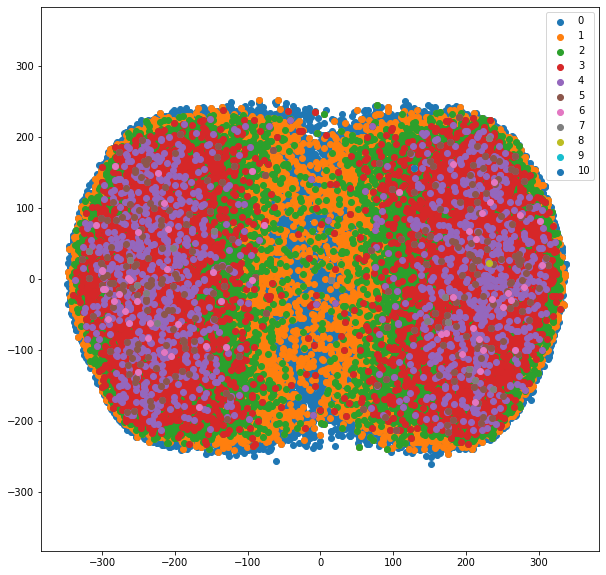

In [5]:
plot_levels(hnsw.graph)

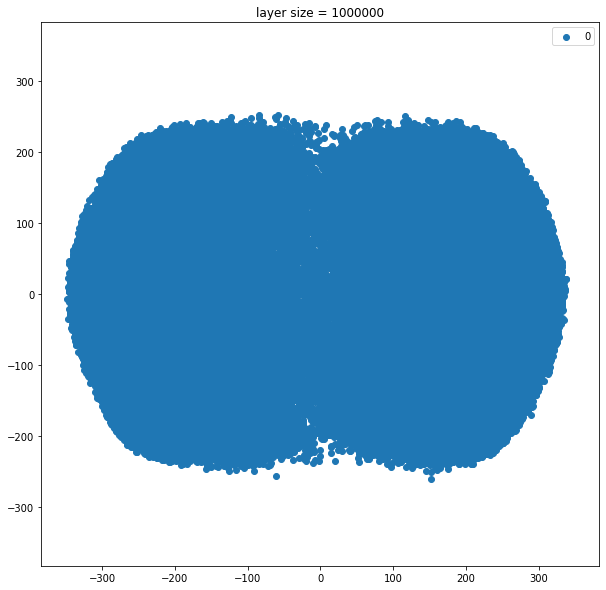

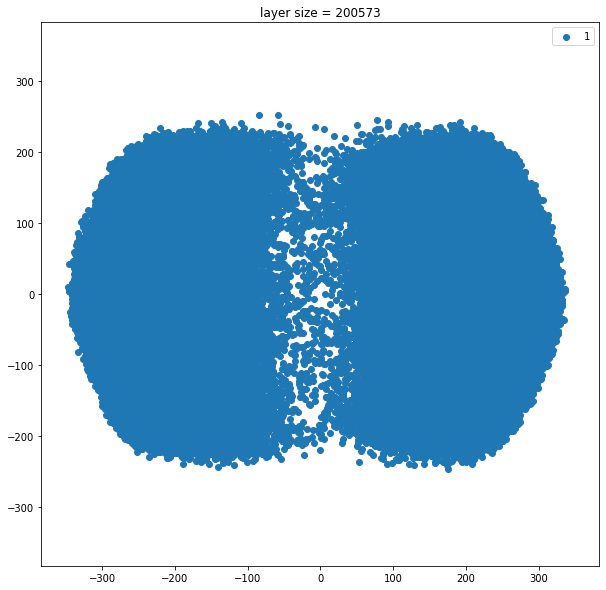

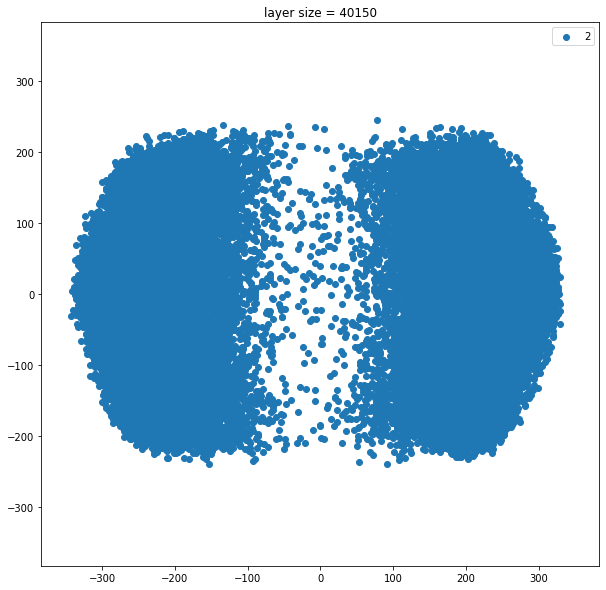

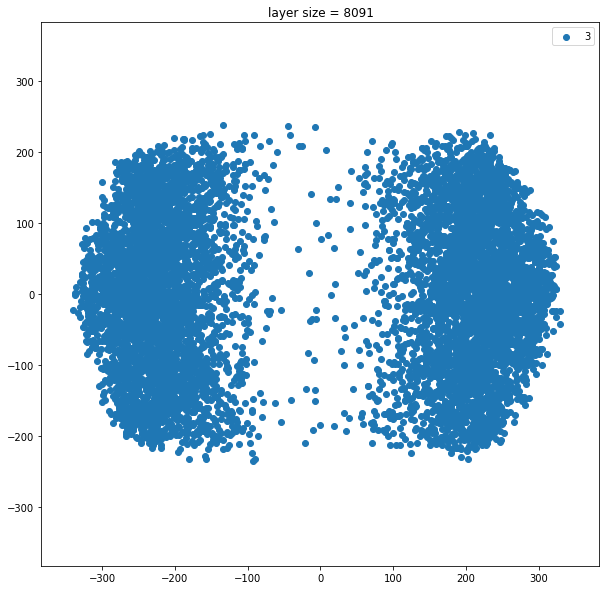

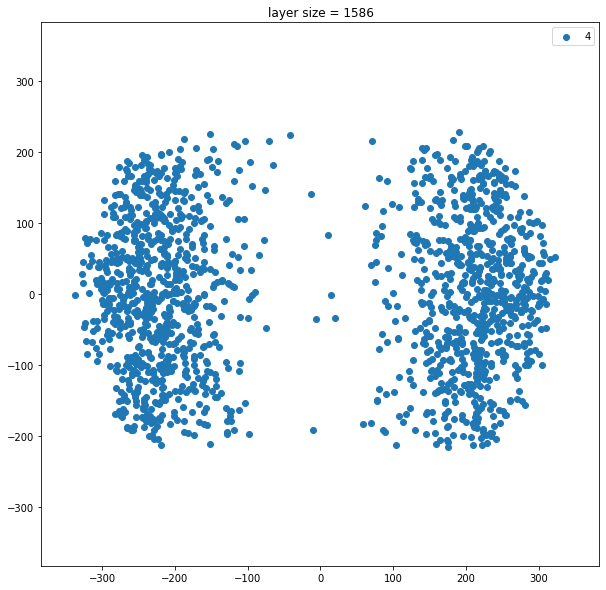

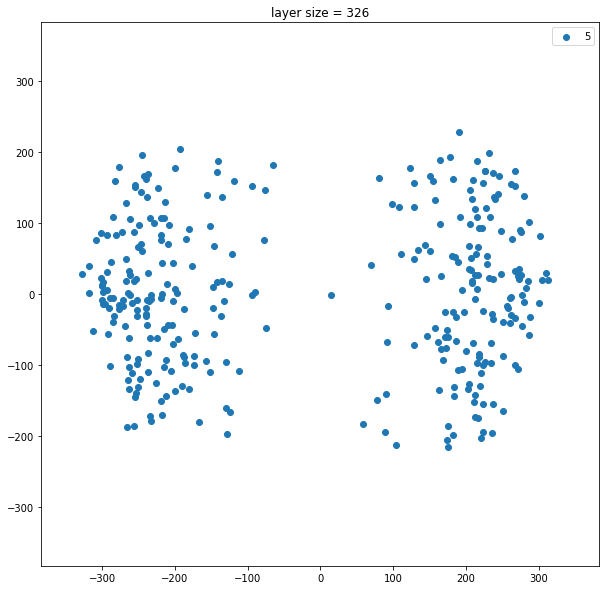

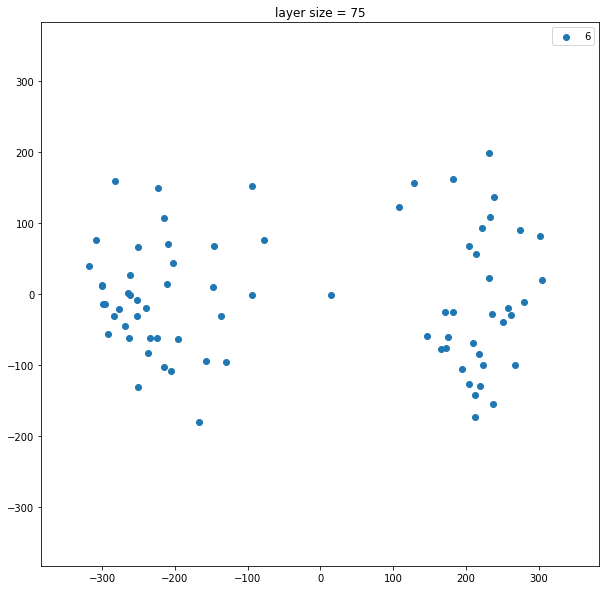

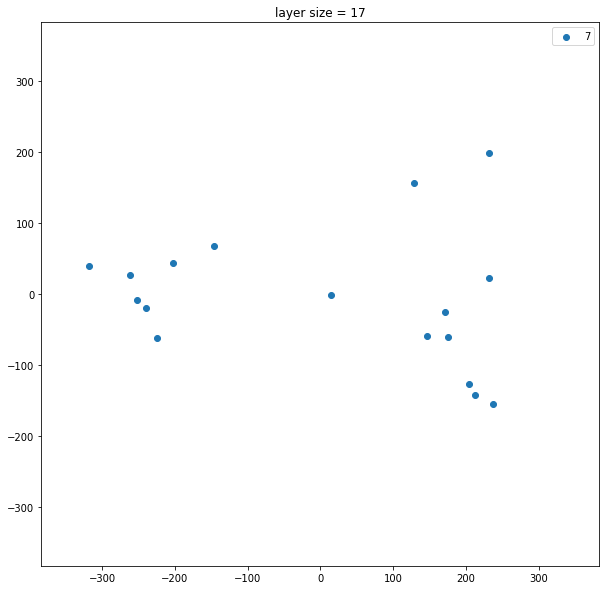

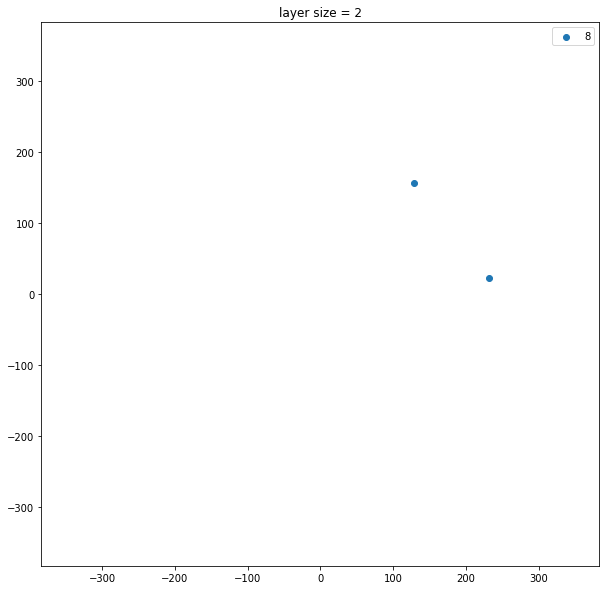

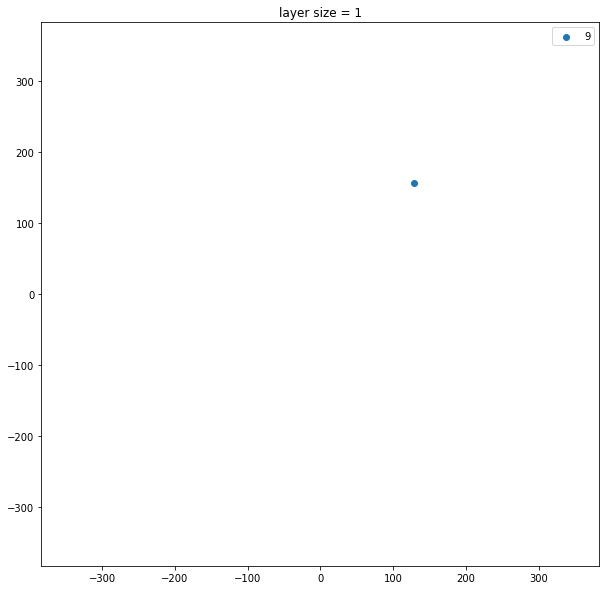

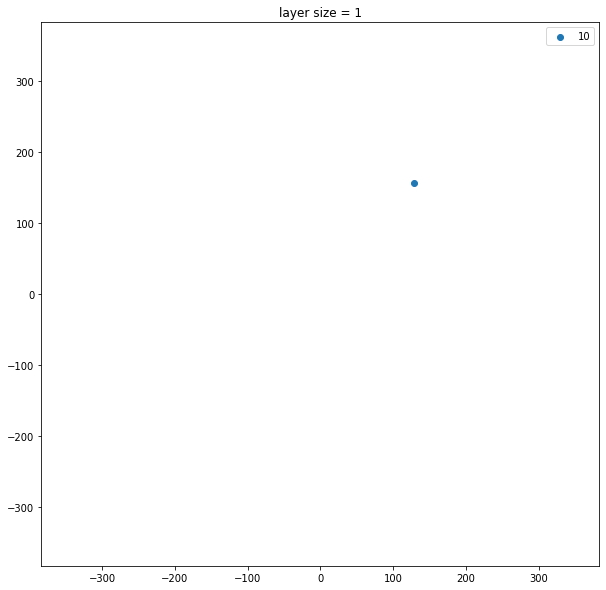

In [6]:
for layer in range(hnsw.graph.height):
    plot_levels(hnsw.graph, layer)

In [13]:
from sklearn.cluster import KMeans

scores = [np.inf, np.inf]
for k in range(2, 31):
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(db_embeddings)
    centroids = model.cluster_centers_
    top_layer = []
    for node in hnsw.graph.nodes:
        if node.get_height() == hnsw.graph.height:
            top_layer.append(node.embedding)
    score = sum(min([hnsw.get_distance(c, t) for c in centroids]) for t in top_layer)/len(top_layer)
    print(f"KMeans k={k}: {score}")
    scores.append(score)

KMeans k=2: 174.77720642089844
KMeans k=3: 107.2121810913086
KMeans k=4: 106.96424102783203
KMeans k=5: 67.37535858154297
KMeans k=6: 67.57274627685547
KMeans k=7: 67.2054214477539
KMeans k=8: 68.9176025390625
KMeans k=9: 69.34635925292969
KMeans k=10: 60.90700912475586
KMeans k=11: 62.126014709472656
KMeans k=12: 42.54330825805664
KMeans k=13: 24.575725555419922
KMeans k=14: 23.183517456054688
KMeans k=15: 24.41362190246582
KMeans k=16: 36.939537048339844
KMeans k=17: 33.762210845947266
KMeans k=18: 32.08927536010742
KMeans k=19: 17.590242385864258
KMeans k=20: 18.314802169799805
KMeans k=21: 17.306800842285156
KMeans k=22: 18.38881492614746
KMeans k=23: 16.651397705078125
KMeans k=24: 6.195309638977051
KMeans k=25: 20.136375427246094
KMeans k=26: 17.49848747253418
KMeans k=27: 31.921194076538086
KMeans k=28: 37.3746223449707
KMeans k=29: 16.34135627746582
KMeans k=30: 35.851226806640625


In [14]:
import numpy as np

k = np.argmin(scores)
#k = 11
kmeans = KMeans(n_clusters=k, random_state=0)
labels = kmeans.fit_predict(db_embeddings)

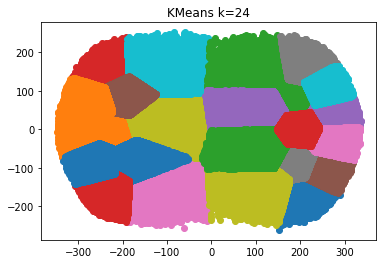

In [25]:
plot_name =f"KMeans k={k}"
for i in np.unique(labels):
    plt.scatter(np.array(db_embeddings)[labels == i , 0] , np.array(db_embeddings)[labels == i , 1] , label = i)
plt.title(plot_name)
plt.show()

In [7]:
from knns.centroid_hnsw import CentroidHNSW

chnsw = CentroidHNSW(n_clusters=24)
chnsw.insert(db_embeddings)#2d: 43m 54.3s

  Indexing  
[▫▫▫▫▫▫▫▫▫▫]
Done: 100/1000000
  Indexing  
[▫▫▫▫▫▫▫▫▫▫]
Done: 200/1000000
  Indexing  
[▫▫▫▫▫▫▫▫▫▫]
Done: 300/1000000
  Indexing  
[▫▫▫▫▫▫▫▫▫▫]
Done: 400/1000000
  Indexing  
[▫▫▫▫▫▫▫▫▫▫]
Done: 500/1000000
  Indexing  
[▫▫▫▫▫▫▫▫▫▫]
Done: 600/1000000
  Indexing  
[▫▫▫▫▫▫▫▫▫▫]
Done: 700/1000000
  Indexing  
[▫▫▫▫▫▫▫▫▫▫]
Done: 800/1000000
  Indexing  
[▫▫▫▫▫▫▫▫▫▫]
Done: 900/1000000
  Indexing  
[▫▫▫▫▫▫▫▫▫▫]
Done: 1000/1000000
  Indexing  
[▫▫▫▫▫▫▫▫▫▫]
Done: 1100/1000000
  Indexing  
[▫▫▫▫▫▫▫▫▫▫]
Done: 1200/1000000
  Indexing  
[▫▫▫▫▫▫▫▫▫▫]
Done: 1300/1000000
  Indexing  
[▫▫▫▫▫▫▫▫▫▫]
Done: 1400/1000000
  Indexing  
[▫▫▫▫▫▫▫▫▫▫]
Done: 1500/1000000
  Indexing  
[▫▫▫▫▫▫▫▫▫▫]
Done: 1600/1000000
  Indexing  
[▫▫▫▫▫▫▫▫▫▫]
Done: 1700/1000000
  Indexing  
[▫▫▫▫▫▫▫▫▫▫]
Done: 1800/1000000
  Indexing  
[▫▫▫▫▫▫▫▫▫▫]
Done: 1900/1000000
  Indexing  
[▫▫▫▫▫▫▫▫▫▫]
Done: 2000/1000000
  Indexing  
[▫▫▫▫▫▫▫▫▫▫]
Done: 2100/1000000
  Indexing  
[▫▫▫▫▫▫▫▫▫▫]
Done: 2200/1000000
  Indexing  
[▫▫▫▫▫

In [8]:
import pickle

with open(f'../data/chnsw24_{db_name}.pkl', 'wb') as file:
    pickle.dump(chnsw, file, pickle.HIGHEST_PROTOCOL)

In [6]:
import pickle

with open(f'../data/chnsw24_{db_name}.pkl', 'rb') as file:
    chnsw = pickle.load(file)

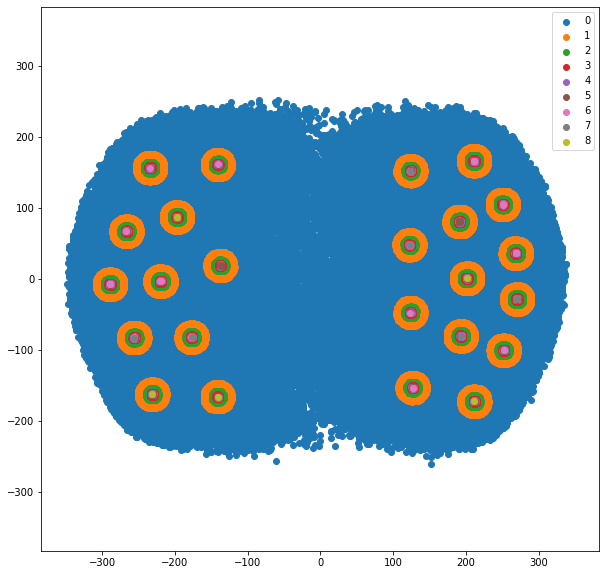

In [9]:
plot_levels(chnsw.graph)

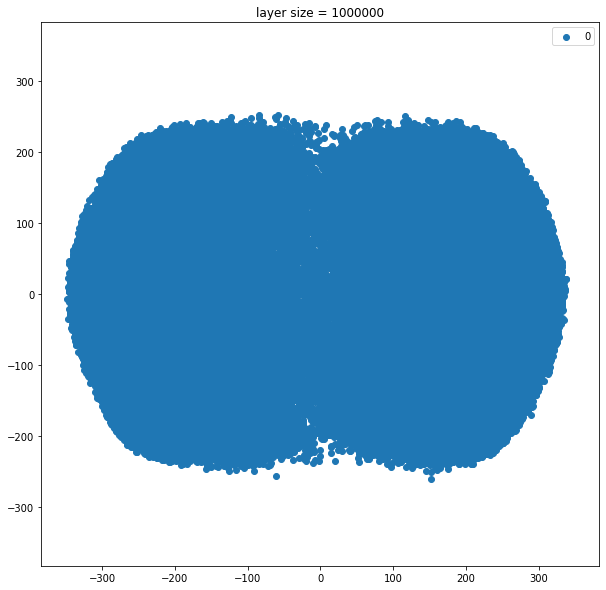

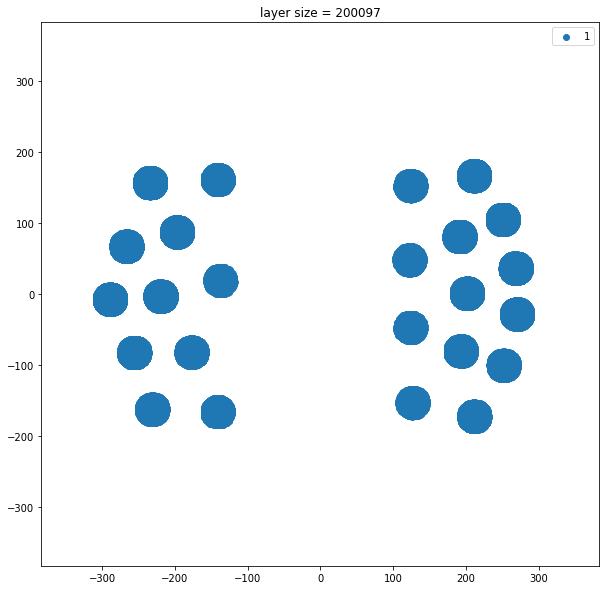

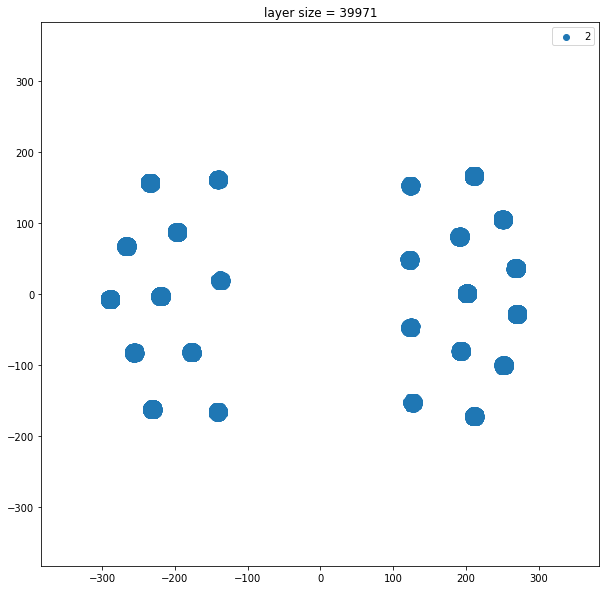

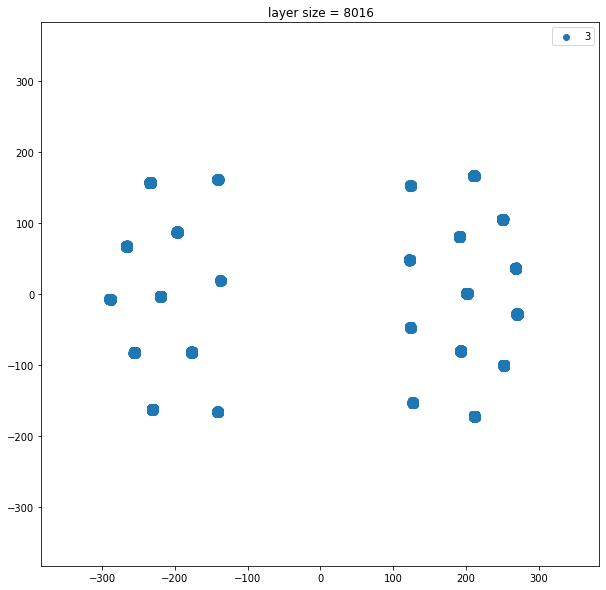

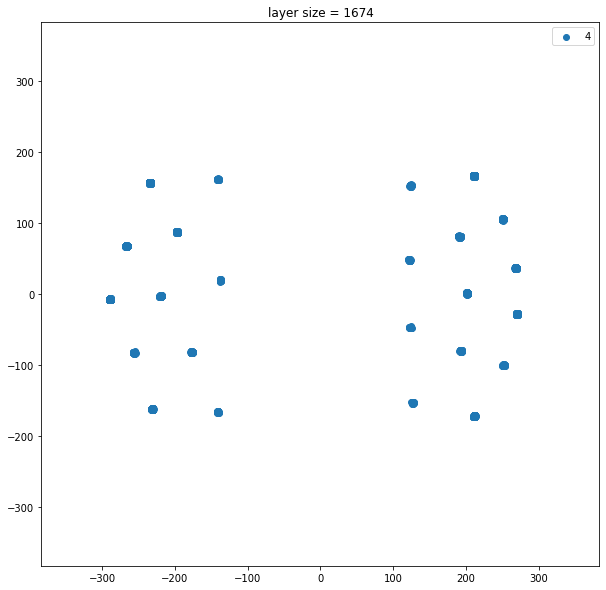

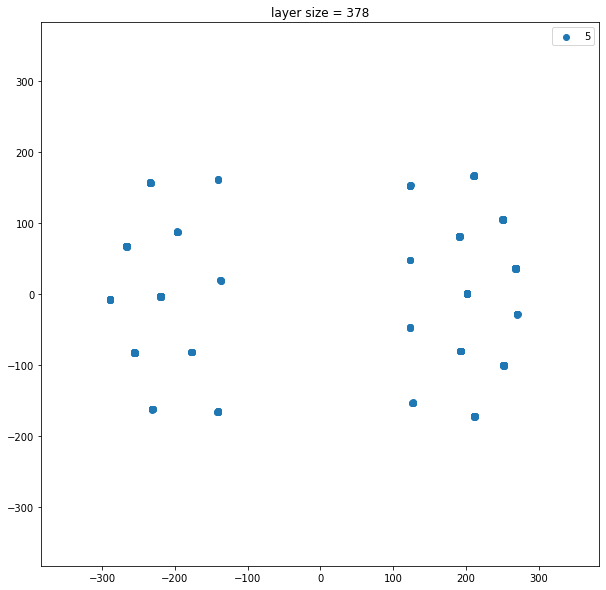

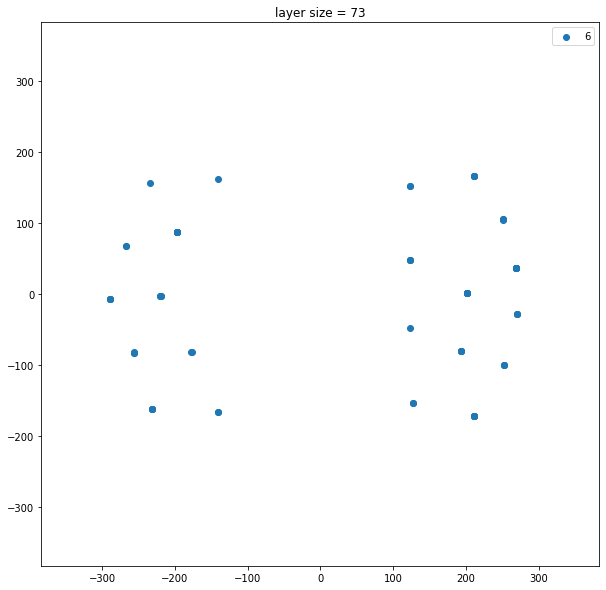

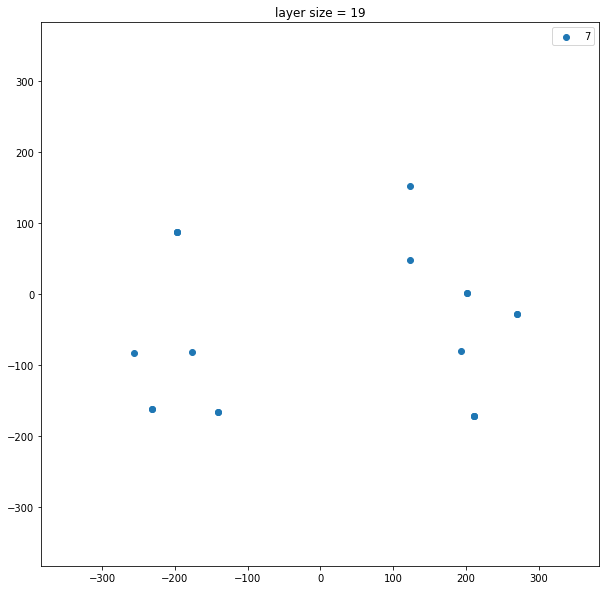

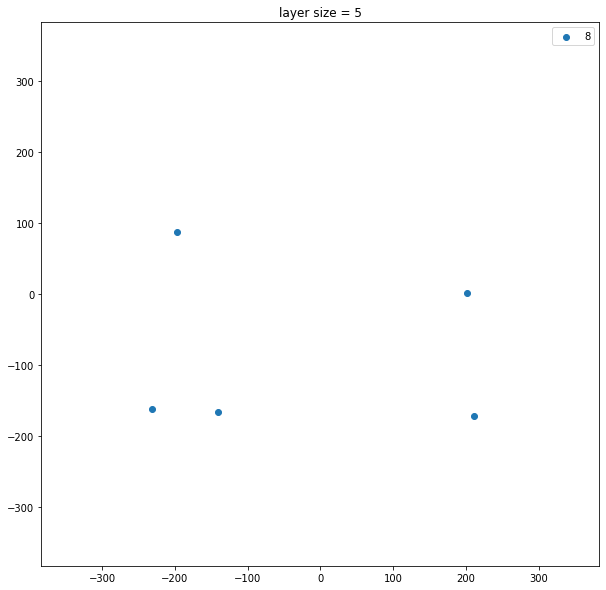

In [10]:
for layer in range(chnsw.graph.height):
    plot_levels(chnsw.graph, layer)

In [17]:
from knns.exhaustive import ExhaustiveKnn

knn = ExhaustiveKnn()
knn.insert(db_embeddings)

In [18]:
test_embeddings = np.load(f"../data/tfds_test_embeddings_{db_name}.npy")

In [19]:
knn.search(test_embeddings[0], k=10)

[(741330, 0.0750593),
 (921525, 0.16431008),
 (926714, 0.17160484),
 (228450, 0.17882563),
 (231573, 0.35785162),
 (929705, 0.4581545),
 (979704, 0.50065756),
 (116573, 0.5232329),
 (173124, 0.5499012),
 (583976, 0.5565305)]

In [22]:
hnsw.search(test_embeddings[0], k=10)

[(921525, 0.16431008),
 (228450, 0.17882563),
 (231573, 0.35785162),
 (929705, 0.4581545),
 (116573, 0.5232329),
 (173124, 0.5499012),
 (801008, 0.56823075),
 (301612, 0.57015985),
 (875697, 0.5969463),
 (88626, 0.6511155)]

In [20]:
chnsw.search(test_embeddings[0], k=10)

[(926714, 0.17160484),
 (228450, 0.17882563),
 (69838, 0.7767482),
 (554002, 1.6681365),
 (206438, 2.2220995),
 (343951, 3.000935),
 (592871, 3.038686),
 (32413, 3.1272945),
 (671078, 3.8658779),
 (694235, 3.9872859)]